<a href="https://colab.research.google.com/github/Sahib61003/DeepLearning_Mini_Projects/blob/main/DogV_sCat_Classifier_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connecting the colab with kaggle for using dataset available on it directly

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:07<00:00, 119MB/s]
100% 1.06G/1.06G [00:07<00:00, 146MB/s]


Using zipfile library to unzip the dataset

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Importing Libraries

In [4]:
import numpy
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

Creatinng Generators so that the processing of large data can be done easily

In [5]:
#Generators -> Used to process large amount of data
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalizing data manually

def to_normalize(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image, label

train_dataset = train_dataset.map(to_normalize)
validation_dataset = validation_dataset.map(to_normalize)

Creation of Model using 3 conv layers and 2 fully connected layers and 1 output layer

In [7]:
#Creating Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 80s 116ms/step - loss: 0.6742 - accuracy: 0.5853 - val_loss: 0.6607 - val_accuracy: 0.6084
Epoch 2/10
625/625 [==============================] - 56s 89ms/step - loss: 0.5690 - accuracy: 0.6991 - val_loss: 0.5243 - val_accuracy: 0.7398
Epoch 3/10
625/625 [==============================] - 55s 87ms/step - loss: 0.4481 - accuracy: 0.7876 - val_loss: 0.4427 - val_accuracy: 0.7894
Epoch 4/10
625/625 [==============================] - 55s 88ms/step - loss: 0.3316 - accuracy: 0.8518 - val_loss: 0.5047 - val_accuracy: 0.7836
Epoch 5/10
625/625 [==============================] - 53s 85ms/step - loss: 0.1923 - accuracy: 0.9223 - val_loss: 0.6458 - val_accuracy: 0.7896
Epoch 6/10
625/625 [==============================] - 53s 83ms/step - loss: 0.1051 - accuracy: 0.9625 - val_loss: 0.8624 - val_accuracy: 0.7918
Epoch 7/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0572 - accuracy: 0.9791 - val_loss: 0.9501 - val_accuracy

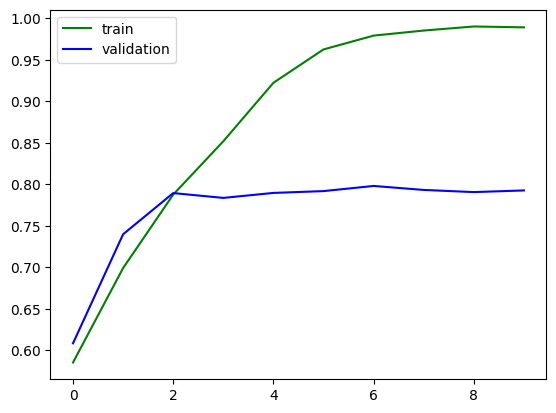

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


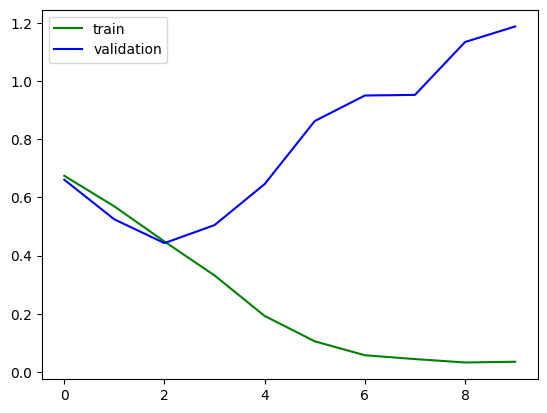

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='green', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()


Hence, there is overfitting

**Different ways to reduce overfitting**
- L1/L2 Regularization
- Dropout
- Batch Normalization

In [13]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [15]:
#Creating Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))



In [16]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 72s 109ms/step - loss: 1.8097 - accuracy: 0.5584 - val_loss: 0.6612 - val_accuracy: 0.5724
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.6668 - accuracy: 0.6239 - val_loss: 0.7028 - val_accuracy: 0.5626
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.6247 - accuracy: 0.6607 - val_loss: 0.6187 - val_accuracy: 0.6752
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5675 - accuracy: 0.7213 - val_loss: 2.0713 - val_accuracy: 0.5230
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5237 - accuracy: 0.7496 - val_loss: 0.5684 - val_accuracy: 0.7370
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4856 - accuracy: 0.7789 - val_loss: 0.5248 - val_accuracy: 0.7588
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4573 - accuracy: 0.7977 - val_loss: 0.5659 - val_ac

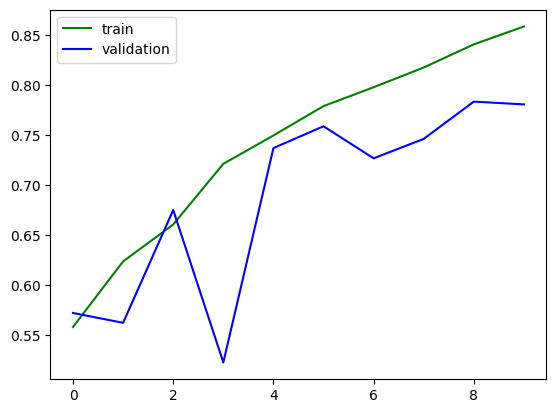

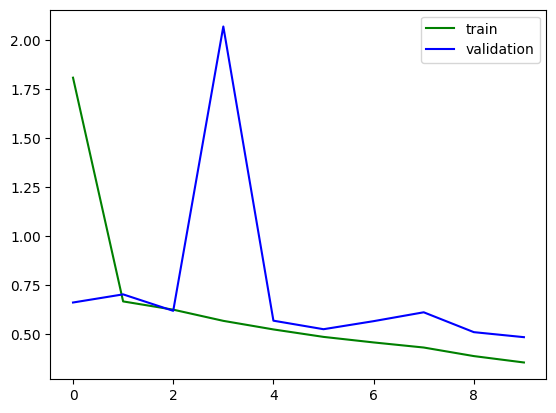

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

plt.plot(history.history['loss'], color='green', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()



Testing on unseen data

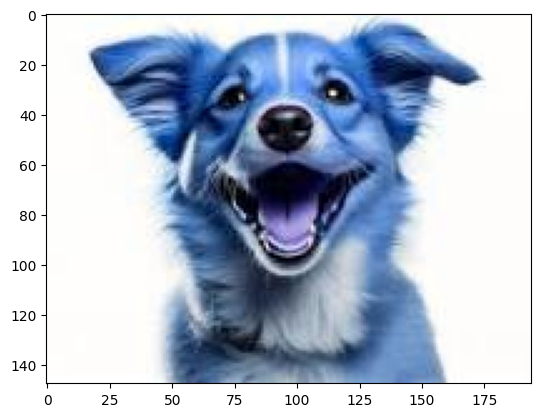

In [24]:
import cv2

img = cv2.imread('/content/download.jpg')

plt.imshow(img)

In [25]:
img.shape

(148, 194, 3)

In [26]:
img = cv2.resize(img, (256, 256))

In [27]:
test_input = img.reshape((1, 256, 256, 3))

In [28]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)